## Gender based violence Project
exploring gender based violence survey dataset.

This project looks at a survey that focused on "Violence against women and girls" in over 70 countries. The data was downloaded from kaggle link https://www.kaggle.com/andrewmvd/violence-against-women-and-girls. In this analysis I focus on answering three questions:
- Gender violence in Kenya
- what was the most common reason given in the survey as to why women were beaten.
- what was the most common form of violence acts committed.

In [1]:
# loading the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
# looking at the data
df = pd.read_csv('violence_data.csv')
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [3]:
df.shape

(12600, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [5]:
df.describe(include='all')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
count,12600.000000,12600,12600,12600,12600,12600,12600,11187.000000
unique,NaN,70,2,5,15,6,18,NaN
top,NaN,Liberia,F,Education,Rural,... if she refuses to have sex with him,01/01/2013,NaN
freq,NaN,180,6300,3360,840,2100,1980,NaN
mean,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,19.762537
std,121.248024,NaN,NaN,NaN,NaN,NaN,NaN,16.986437
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,105.750000,NaN,NaN,NaN,NaN,NaN,NaN,6.200000
50%,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.900000
75%,315.250000,NaN,NaN,NaN,NaN,NaN,NaN,29.200000


- The dataset is made up of 12600 rows and 8 columns. 
- there are 70 countries included in the survey.
- each respondent was asked 6 questions.


next I explore the countries, questions and demographic questions covered in this study. 

In [6]:
df['Demographics Question'].unique()

array(['Marital status', 'Education', 'Employment', 'Age', 'Residence'],
      dtype=object)

In [7]:
print(df.Country.unique())

['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Benin' 'Bolivia' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Chad'
 'Colombia' 'Comoros' 'Congo' 'Congo Democratic Republic' "Cote d'Ivoire"
 'Dominican Republic' 'Egypt' 'Eritrea' 'Eswatini' 'Ethiopia' 'Gabon'
 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Jordan' 'Kenya' 'Kyrgyz Republic' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Maldives' 'Mali' 'Moldova' 'Morocco' 'Mozambique'
 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Pakistan'
 'Peru' 'Philippines' 'Rwanda' 'Sao Tome and Principe' 'Senegal'
 'Sierra Leone' 'South Africa' 'Tajikistan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Turkey' 'Turkmenistan' 'Uganda' 'Ukraine' 'Yemen' 'Zambia'
 'Zimbabwe']


In [8]:
df.Question.unique()

array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

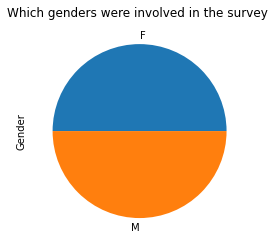

In [9]:
cases_reported = df['Gender'].value_counts()
(cases_reported/df.shape[0]).plot(kind="pie");
plt.title("Which genders were involved in the survey ");

it seem like both male and female repondents were invovled in the survey.

In [10]:
Kenya_GV = df[df.Country == "Kenya"]
Kenya_GV.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
6120,385,Kenya,F,Age,15-24,... for at least one specific reason,01/01/2014,42.0
6121,385,Kenya,F,Age,25-34,... for at least one specific reason,01/01/2014,39.8
6122,385,Kenya,F,Age,35-49,... for at least one specific reason,01/01/2014,44.0
6123,105,Kenya,F,Age,15-24,... if she argues with him,01/01/2014,20.9
6124,105,Kenya,F,Age,25-34,... if she argues with him,01/01/2014,20.1


Next I visualise the gender violence in Kenya justification based on residence

Text(0.5, 1.05, 'Kenyans agreeing a husband is justified in hitting his wife')

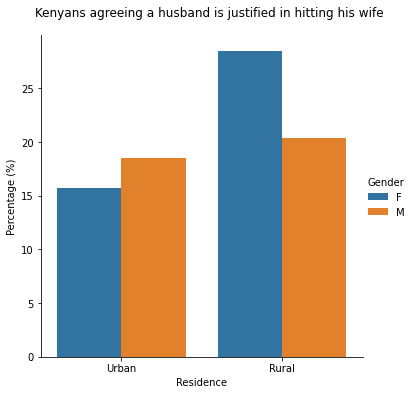

In [16]:
Kenya_graph = Kenya_GV[Kenya_GV['Demographics Question'] == 'Residence']
Kenya_chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Gender',
                         order = ['Urban', 'Rural'],
                         data = Kenya_graph, kind = 'bar', ci=None)
Kenya_chart.set_axis_labels('Residence', 'Percentage (%)')
Kenya_chart.fig.suptitle('Kenyans agreeing a husband is justified in hitting his wife', y=1.05)

Text(0.5, 1.05, 'Kenyans agreeing a husband is justified in hitting his wife')

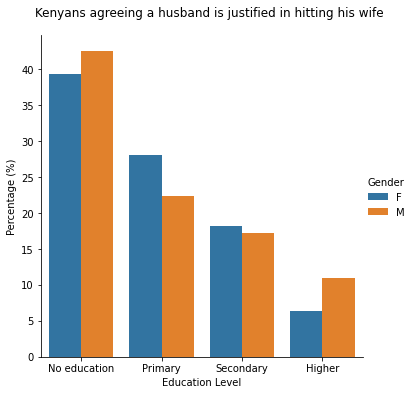

In [15]:
Kenya_graph = Kenya_GV[Kenya_GV['Demographics Question'] == 'Education']
Kenya_chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Gender',
                         order = ['No education', 'Primary', 'Secondary', 'Higher'],
                         data = Kenya_graph, kind = 'bar', ci=None)
Kenya_chart.set_axis_labels('Education Level', 'Percentage (%)')
Kenya_chart.fig.suptitle('Kenyans agreeing a husband is justified in hitting his wife', y=1.05)